In [31]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dtree import DecisionTree

## Part 1: Tennis example

The tennis data comprises of 4 features (Outlook, Temperature, Humidity, Wind) and a label (PlayTennis).

In [24]:
# reading training data
data = pd.read_csv('tennis.csv', header=0)
features = data.columns[:-1]
label = data.columns[-1]
data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


First, training and testing decision on the same instances as a sanity check.

In [25]:
# creating empty decision tree, demonstrating information gain calculations
d = DecisionTree()
maxig, name, split = d.max_info_gain(data, features, label)
# From observation, the best attribute is Outlook
print(maxig, name)

0.246749819774 Outlook


In [26]:
# training the tree on the loaded data
d.train(data, label)
# after training, the root node should have Outlook attribute, and the child node for Overcase should have a label
print('Root:', d.root)
print('Children:', d.root.children)

Root: Outlook node
Children: {'Overcast': Yes label, 'Rain': Wind node, 'Sunny': Humidity node}


In [27]:
# checking if trained tree perfectly predicts training instances
(d.predict(data) == data[label]).all()

True

Then, splitting the training data in a 4/10 test/train split.

Accuracy: 0.75


<IPython.core.display.Javascript object>


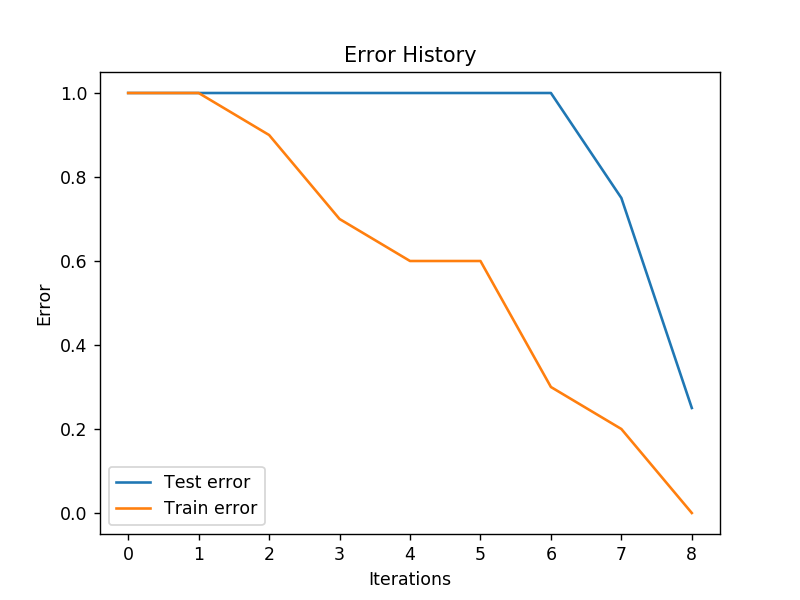

In [39]:
train = data.head(10)  # training set
test = data.tail(4)    # validation set
d = DecisionTree()
hist = d.train(train, label, validation={'test': test, 'train': train})  # training and obtaining error history
print('Accuracy:', (d.predict(test) == test[label]).sum() / len(test))
# plotting
plt.plot(hist['test'], label='Test error')
plt.plot(hist['train'], label='Train error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error History')
plt.legend()
plt.show()